# Data analysis and figures for the IRimage paper

### Part 1: comparison with existing tools (Fig. 2)

Gustavo Pereyra Irujo


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["legend.loc"] = 'best'
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 12


## Comparison with existing tools (FLIR Tools)

Each image was processed using either FLIR Tools (reference software) or IRimage. This Figure shows both resuling false-color images, and two plots comparing the temperature values obtained (one showing the full range of values, and another one showing a subset in detail)

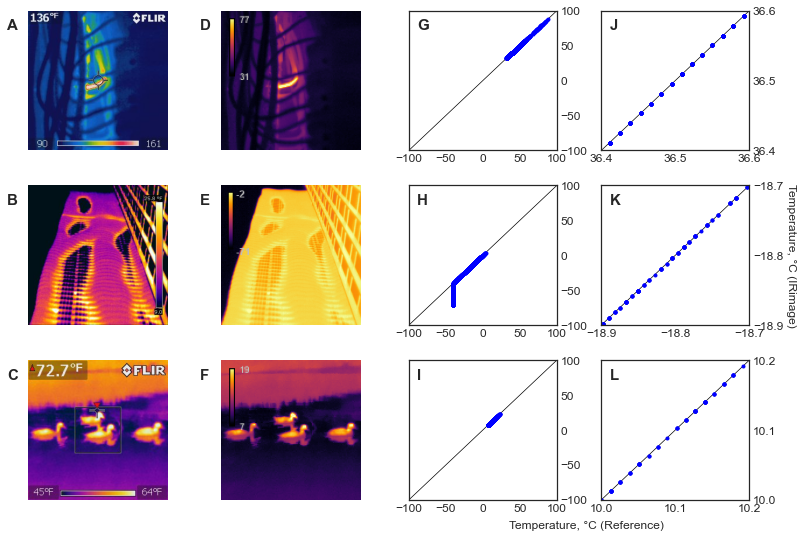

In [2]:
# images to be processed
image_list = {'200_deg_neutral', '20120726211114!Thermal_image_of_four_ducks_swimming', 'Aqua_Tower_thermal_imaging'}
n_images = len(image_list)
flir_tools_data_folder  = '../csv/'
irimage_data_folder     = '../text/'
flir_tools_image_folder = '../'
irimage_image_folder    = '../color/'

# create figure
fig = plt.figure(figsize=(13, 3*n_images))
gs = fig.add_gridspec(n_images, 4, hspace=0.25, wspace=0.3)
axs = gs.subplots()

# loop through all the images
for i, image_filename in enumerate(image_list):

    ## IMAGES
    
    # open images
    flir_tools_image_path = flir_tools_image_folder + image_filename + '.jpg'
    flir_tools_image = mpimg.imread(flir_tools_image_path)
    irimage_image_path = irimage_image_folder + image_filename + '.png'
    irimage_image = mpimg.imread(irimage_image_path)
    # plot images
    axs[i,0].imshow(flir_tools_image)
    axs[i,0].axis('off')
    axs[i,1].imshow(irimage_image)
    axs[i,1].axis('off')


    ## DATA
    
    # complete path to the files with data
    flir_tools_path = flir_tools_data_folder + image_filename + '.csv'
    irimage_path    = irimage_data_folder + image_filename + '.txt'

    # get data from files
    flir_tools_data   = pd.read_csv(flir_tools_path, sep='\t', lineterminator='\n', header = None)
    flir_tools_values = pd.melt(flir_tools_data)['value']
    irimage_data      = pd.read_csv(irimage_path, sep='\t', lineterminator='\n', header = None)
    irimage_values    = pd.melt(irimage_data)['value']

    ## complete plot
    # plot the 1:1 line
    min = -100
    max = 100
    axs[i, 2].plot([min,max], [min,max], '-k', linewidth=0.7)
    # plot values
    axs[i, 2].plot(flir_tools_values, irimage_values, 'ob', markersize=3)
    # axes limits
    axs[i, 2].set_xlim(min, max)
    axs[i, 2].set_ylim(min, max)
    axs[i, 2].yaxis.tick_right()

    ## 'zoomed-in' plot, showing in detail only a subset of values
    # plot the 1:1 line
    mean = round(irimage_values.mean(),1)
    min = mean - 0.1
    max = mean + 0.1
    axs[i, 3].plot([min,max], [min,max], '-k', linewidth=0.7)
    # plot data
    axs[i, 3].plot(flir_tools_values, irimage_values, 'ob', markersize=3)
    # axes limits
    axs[i, 3].set_xlim(min, max)
    axs[i, 3].set_xticks([min, mean, max])
    axs[i, 3].set_ylim(min, max)
    axs[i, 3].set_yticks([min, mean, max])
    axs[i, 3].yaxis.tick_right()

    ## subplot letters

    axs[i,0].set_title(chr(65           +i), x=-0.15, y=0.9, ha='left', va='top', fontsize=15, fontweight='bold')
    axs[i,1].set_title(chr(65+n_images  +i), x=-0.15, y=0.9, ha='left', va='top', fontsize=15, fontweight='bold')
    axs[i,2].set_title(chr(65+n_images*2+i), x=0.055, y=0.9, ha='left', va='top', fontsize=15, fontweight='bold')
    axs[i,3].set_title(chr(65+n_images*3+i), x=0.055, y=0.9, ha='left', va='top', fontsize=15, fontweight='bold')


# set y-axis label in the middle
middle_plot = int((n_images+1)/2)-1
axs[middle_plot, 3].set_ylabel('Temperature, °C (IRimage)', rotation=-90)
if (((n_images+1)/2) % 2) != 0: 
    axs[middle_plot, 3].yaxis.set_label_coords(1.25,-0.11)
else:
    axs[middle_plot, 3].yaxis.set_label_coords(1.25,0.5)

# set x-axis label in the middle
axs[n_images-1, 2].set_xlabel('Temperature, °C (Reference)')
axs[n_images-1, 2].xaxis.set_label_coords(1.2,-0.15)

# save figure
plt.savefig('../../figures/Figure_2.png', bbox_inches = 'tight', pad_inches = 0.1, dpi=240)
